<a href="https://colab.research.google.com/github/olupy/ml-models/blob/main/pm_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving JanData.xlsx to JanData (2).xlsx


<ipython-input-4-8d8dd43728fd>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mile_12_daily = mile_12.groupby(pd.Grouper(key='date', freq='24H')).mean()
<ipython-input-4-8d8dd43728fd>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  motorway_daily = motorway.groupby(pd.Grouper(key='date', freq='24H')).mean()
<ipython-input-4-8d8dd43728fd>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  majidun_daily = majidun.gr

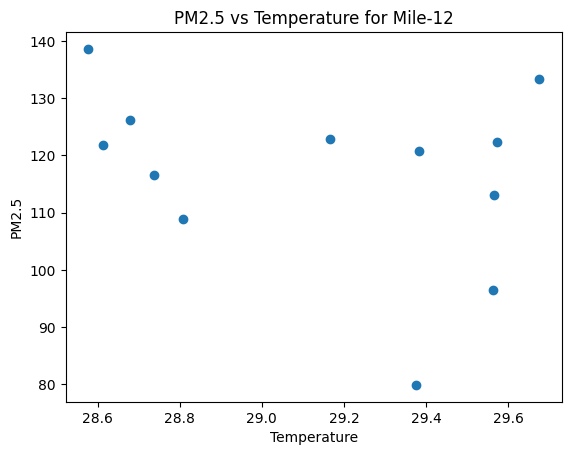

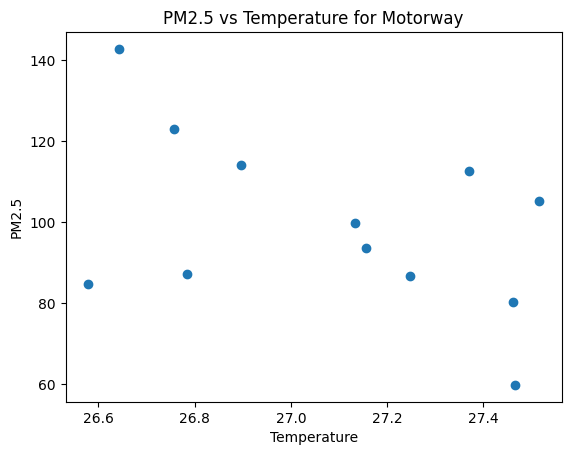

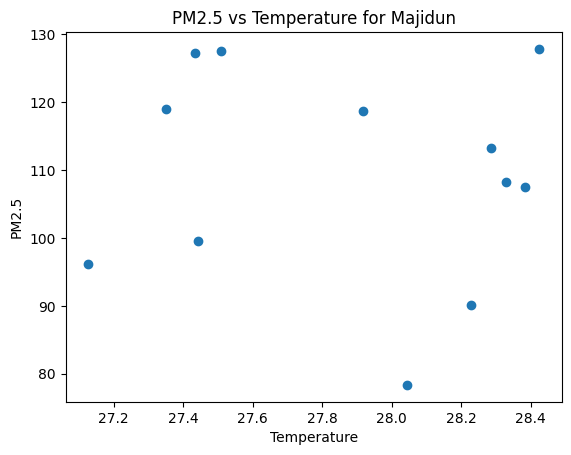

In [4]:
import io
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))

# remove rows with missing data
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
#df['date'] = df['date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M'))
# we need to extract the different data for different location
mile_12 = df[df['loc'] == 'Mile-12']
motorway = df[df['loc'] == 'Motorway']
majidun = df[df['loc'] == 'Majidun']

# we group the data and find the average for a 24 hour period
mile_12_daily = mile_12.groupby(pd.Grouper(key='date', freq='24H')).mean()
motorway_daily = motorway.groupby(pd.Grouper(key='date', freq='24H')).mean()
majidun_daily = majidun.groupby(pd.Grouper(key='date', freq='24H')).mean()


plt.scatter(mile_12_daily['temp'],mile_12_daily['pm25'])
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('PM2.5 vs Temperature for Mile-12')
plt.show()

plt.scatter(motorway_daily['temp'], motorway_daily['pm25'])
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('PM2.5 vs Temperature for Motorway')
plt.show()

plt.scatter(majidun_daily['temp'], majidun_daily['pm25'])
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('PM2.5 vs Temperature for Majidun')
plt.show()

#plt.plot(mile_12_daily['pm25'], label='Mile-12')
#plt.plot(motorway_daily['pm25'], label='Motorway')
#plt.plot(majidun_daily['pm25'], label='Majidun')
#plt.xlabel('Date')
#plt.ylabel('PM25')
#plt.title('PM25 Variation by Location')
#plt.legend()
#plt.show()

